In [1]:
import numpy as np
import pandas as pd

from pandas import Series, DataFrame

In [14]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/'

In [20]:
dfwine = pd.read_csv('winequality-red.csv',sep=';')

In [24]:
dfwine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5


In [25]:
# find average alcohol content
dfwine['alcohol'].mean()

10.422983114446502

In [26]:
# make our own aggregation
def max_to_min(arr):
    return arr.max() - arr.min()

In [27]:
# implement group by
wino = dfwine.groupby('quality')

In [29]:
# get stats
wino.describe().head()

alcohol  chlorides  citric acid    density  fixed acidity  \
quality                                                                      
3       count  10.000000  10.000000    10.000000  10.000000      10.000000   
        mean    9.955000   0.122500     0.171000   0.997464       8.360000   
        std     0.818009   0.066241     0.250664   0.002002       1.770875   
        min     8.400000   0.061000     0.000000   0.994710       6.700000   
        25%     9.725000   0.079000     0.005000   0.996150       7.150000   

               free sulfur dioxide         pH  residual sugar  sulphates  \
quality                                                                    
3       count            10.000000  10.000000       10.000000   10.00000   
        mean             11.000000   3.398000        2.635000    0.57000   
        std               9.763879   0.144052        1.401596    0.12202   
        min               3.000000   3.160000        1.200000    0.40000   
        25%               5.000000   3.312500        1.875000    0.51250   

               total sulfur dioxide  volatile acidity  
quality                                                
3       count             10.000000         10.000000  
        mean              24.900000          0.884500  
        std               16.828877          0.331256  
        min                9.000000          0.440000  
        25%               12.500000          0.647500

In [30]:
# how to pass general aggregation .agg()
wino.agg(max_to_min)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,4.9,1.140,0.66,4.5,0.206,31,40,0.00609,0.47,0.46,2.6
4,7.9,0.900,1.00,11.6,0.565,38,112,0.00760,1.16,1.67,4.1
5,10.9,1.150,0.79,14.3,0.572,65,149,0.01059,0.86,1.61,6.4
6,9.6,0.880,0.78,14.5,0.381,71,159,0.01362,1.15,1.55,5.6
7,10.7,0.795,0.76,7.7,0.346,51,282,0.01256,0.86,0.97,4.8
8,7.6,0.590,0.69,5.0,0.042,39,76,0.00800,0.84,0.47,4.2


In [33]:
# we can also use generic methods
wino.agg('mean')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


In [35]:
# see if alcohol percentage is related to quality
dfwine['qual/alc ratio'] = dfwine['quality'] / dfwine['alcohol']
dfwine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qual/alc ratio
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,0.531915
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5,0.510204
2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5,0.510204
3,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6,0.612245
4,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,0.531915


In [36]:
# use pivot tables
dfwine.pivot_table(index=['quality'])

,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,qual/alc ratio,residual sugar,sulphates,total sulfur dioxide,volatile acidity
quality,,,,,,,,,,,,
3,9.955000,0.122500,0.171000,0.997464,8.360000,11.000000,3.398000,0.303286,2.635000,0.570000,24.900000,0.884500
4,10.265094,0.090679,0.174151,0.996542,7.779245,12.264151,3.381509,0.392724,2.694340,0.596415,36.245283,0.693962
5,9.899706,0.092736,0.243686,0.997104,8.167254,16.983847,3.304949,0.507573,2.528855,0.620969,56.513950,0.577041
6,10.629519,0.084956,0.273824,0.996615,8.347179,15.711599,3.318072,0.569801,2.477194,0.675329,40.869906,0.497484
7,11.465913,0.076588,0.375176,0.996104,8.872362,14.045226,3.290754,0.614855,2.720603,0.741256,35.020101,0.403920
8,12.094444,0.068444,0.391111,0.995212,8.566667,13.277778,3.267222,0.668146,2.577778,0.767778,33.444444,0.423333


In [38]:
%matplotlib inline

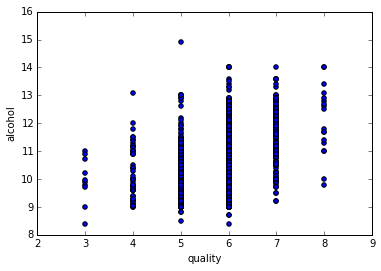

In [39]:
# alcohol vs quality
dfwine.plot(kind='scatter', x='quality', y='alcohol')

{'boxes': [<matplotlib.lines.Line2D at 0x7fdae40172d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fdae402a190>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fdae403f490>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fdae402ae10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fdae4017450>,
  <matplotlib.lines.Line2D at 0x7fdae4017b10>]}

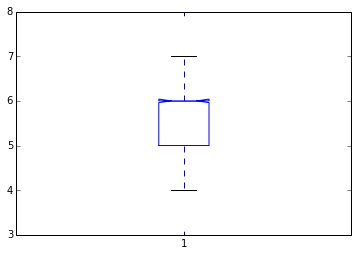

In [49]:
from pylab import *
figure()
boxplot(dfwine['quality'],1)